In [1]:
import pandas as  pd
import numpy as np
import os
#print(os.getcwd())
os.chdir('C:\\Vishakha\\Python_projects\\bank-marketing\\bankbalanced')
#print(os.listdir())
bank_df = pd.read_csv("bank.csv")
print(bank_df.head())

   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  


In [1]:
import matplotlib.pyplot as plt 
import  seaborn  as sns
from sklearn.cluster import KMeans
from sklearn import datasets 
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree 
from sklearn import metrics 
%matplotlib inline
print(bank_df.info())

NameError: name 'bank_df' is not defined

In [3]:
print(bank_df.describe())

                age       balance           day      duration      campaign  \
count  11162.000000  11162.000000  11162.000000  11162.000000  11162.000000   
mean      41.231948   1528.538524     15.658036    371.993818      2.508421   
std       11.913369   3225.413326      8.420740    347.128386      2.722077   
min       18.000000  -6847.000000      1.000000      2.000000      1.000000   
25%       32.000000    122.000000      8.000000    138.000000      1.000000   
50%       39.000000    550.000000     15.000000    255.000000      2.000000   
75%       49.000000   1708.000000     22.000000    496.000000      3.000000   
max       95.000000  81204.000000     31.000000   3881.000000     63.000000   

              pdays      previous  
count  11162.000000  11162.000000  
mean      51.330407      0.832557  
std      108.758282      2.292007  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       20.750000      1.000000  


# Categorical Variables are:
job, marital, education , default, housing, loan, contact, month, poutcome, deposit 

# Numerical Varibales are: age, balance, day, duration, campaign, pdays, previous


In [5]:
# analysing categorical variables
y = bank_df['deposit']
x = bank_df
y = y.to_frame()
y

,deposit
0,yes
1,yes
2,yes
3,yes
4,yes
5,yes
6,yes
7,yes
8,yes
9,yes


In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.4,random_state = 101)
print(y.shape)
print(x.shape)
print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(11162, 1)
(11162, 17)
(6697, 1)
(6697, 17)
(4465, 1)
(4465, 17)


In [7]:
x_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

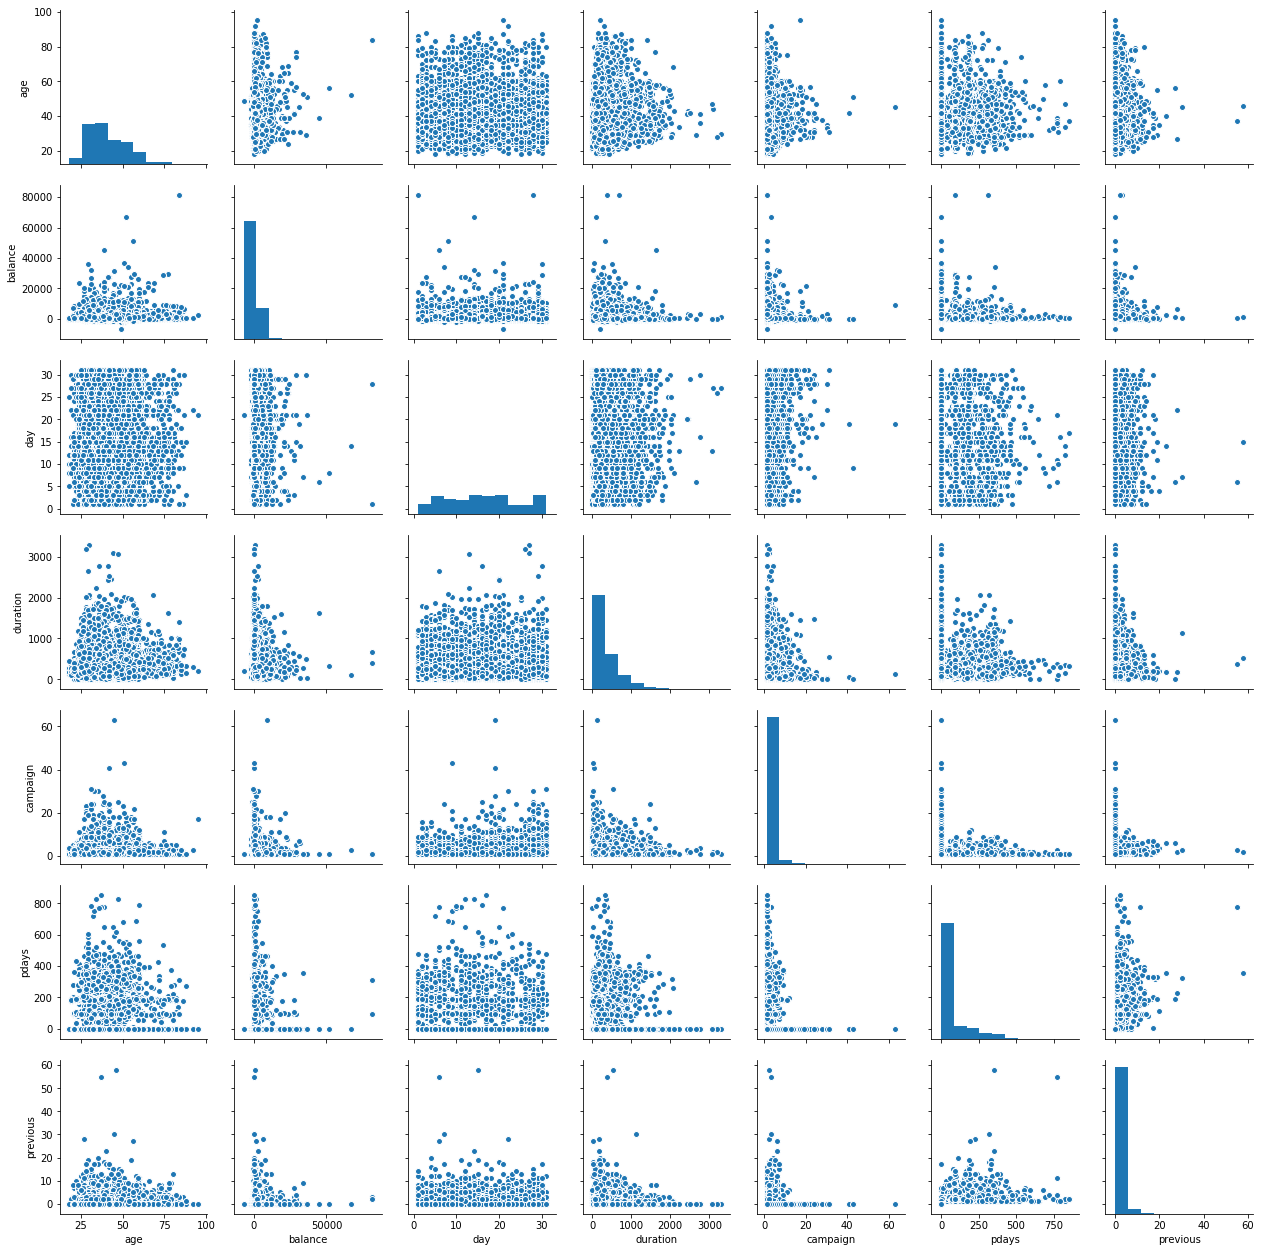

In [8]:
sns.pairplot(x_train,diag_kind = 'hist')

In [9]:
combine = [y_train,y_test]
deposit_mapping = {'yes': 1,'no': 0}
for dt in combine:
    dt['depoist'] = dt['deposit'].map(deposit_mapping)
y_train

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,deposit,depoist
10668,no,0
10997,no,0
10012,no,0
2941,yes,1
7877,no,0
2597,yes,1
8595,no,0
3025,yes,1
1157,yes,1
7115,no,0


In [10]:
# assigning 1 to yes and 0 to no in deposit 
combine_ = [x_train, x_test]
deposit_mapping_ = {'yes': 1 ,'no': 0}
for dt1 in combine_:
    dt1['deposit'] = dt1['deposit'].map(deposit_mapping_)


C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [11]:
x_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
10668,34,technician,single,secondary,no,664,yes,yes,cellular,11,may,88,2,343,2,other,0
10997,35,management,married,tertiary,no,1193,yes,no,unknown,2,jun,101,2,-1,0,unknown,0
10012,31,technician,married,secondary,no,2420,yes,no,cellular,19,nov,166,1,-1,0,unknown,0
2941,36,technician,single,secondary,no,376,no,no,cellular,13,nov,193,1,92,1,success,1
7877,53,entrepreneur,married,tertiary,no,1129,no,yes,cellular,28,jul,241,8,-1,0,unknown,0


In [12]:
# analysing categorical variables
#analysing the variable 'job'
x_train[['job','deposit']].groupby('job',as_index= False).mean().sort_values('deposit',ascending = False)

,job,deposit
8,student,0.764706
5,retired,0.663774
10,unemployed,0.566372
4,management,0.510471
11,unknown,0.488889
9,technician,0.461045
6,self-employed,0.453333
0,admin.,0.439949
3,housemaid,0.427711
7,services,0.408929


We see that Student, Retired and Unemployed are more likely to deposit. So we assign 1 to student, 2 to retired, 3 to unemployed and 0 to others  

In [13]:
for df in combine_:
    df['job'] = df['job'].replace(['management', 'technician', 'unknown', 'admin.','housemaid','self-employed','serivces','blue-collar','entrepreneur'],'rare',regex = True)
    jobmapping = {'student': 1, 'retired': 2, 'unemployed': 3,'rare': 0}
    for df in combine_:
        df['job'] = df['job'].map(jobmapping)


C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [14]:
#analysing the variable marital which signifies the marital status of the person
x_train[['marital','deposit']].groupby('marital',as_index = False).mean().sort_values('deposit',ascending = False)

,marital,deposit
2,single,0.537162
0,divorced,0.491762
1,married,0.430136


We see that marital status is of not much significance when deciding whether the person will deposit or not. Therfore we eleminate this factor.


In [15]:
# analysing the variable education
x_train[['education','deposit']].groupby('education', as_index = False).mean().sort_values('deposit',ascending = False)

,education,deposit
2,tertiary,0.541043
3,unknown,0.491409
1,secondary,0.442739
0,primary,0.395127


From the above results we can say that the more eductated the person is more likely he/she is likely to deposit. Therefore we assign 1 to primary, 2 to secondary, 3 to tertiary and 0 to unknown .

In [16]:
educationmapping = {'primary': 1 ,'secondary':2 ,'tertiary': 3,'unknown': 0}
for df in combine_:
    df['education'] = df['education'].map(educationmapping)
    

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# analysing the variable default
x_train[['default','deposit']].groupby('default',as_index = False).mean().sort_values('deposit',ascending = False)

,default,deposit
0,no,0.473796
1,yes,0.242105


We see that who did not have credit in default,deposited more. We assign1 to no and 0 to yes

In [18]:
defaultmapping = {'no' :1 ,'yes': 0}
for df in combine_:
    df['default'] = df['default'].map(defaultmapping)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
#analysing the variable 'loan'

x_train[['loan','deposit']].groupby('loan',as_index=False).mean().sort_values('deposit',ascending=False)

,loan,deposit
0,no,0.492337
1,yes,0.328090


we can see that people who did not have personal loan ,deposited more. We assign 1 to 'no' and 0 to 'yes'

In [20]:
loanmapping={'no':1,'yes':0}
for df in combine_:
    df['loan']=df['loan'].map(defaultmapping)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
#analysing the variable 'contact'

x_train[['contact','deposit']].groupby('contact',as_index=False).mean().sort_values('deposit',ascending=False)

,contact,deposit
0,cellular,0.537938
1,telephone,0.497881
2,unknown,0.223273


We can see that the way the customer was contacted has little to do with whether the person has deposited,so we drop this variable.

In [22]:
#analysing the variable 'month'

x_train[['month','deposit']].groupby('month',as_index=False).mean().sort_values('deposit',ascending=False)

,month,deposit
7,mar,0.908571
2,dec,0.898551
11,sep,0.840206
10,oct,0.822511
0,apr,0.595149
3,feb,0.554113
1,aug,0.453125
6,jun,0.442149
9,nov,0.431542
5,jul,0.423414


We will classify months into three categories. Let us assign 2 to 'mar,dec,sep,oct' 1 to 'apr,feb,aug,jun' and  0 to 'nov,jul,jan,may'

In [23]:
for df in combine_:
    df['month'] = df['month'].replace(['mar','dec','sep','oct'],2, regex = True)
    df['month'] = df['month'].replace(['apr','feb','aug','jun'],1, regex = True)
    df['month'] = df['month'].replace(['nov','jul','jan','may'],0, regex = True)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [24]:
# analysing the variable 'poutcome'
x_train[['poutcome','deposit']].groupby('poutcome', as_index = False).mean().sort_values('deposit', ascending = False)

,poutcome,deposit
2,success,0.909091
1,other,0.583851
0,failure,0.478764
3,unknown,0.405444


We can see that people who have deposited previously, deposited again. We assign 2 to success, 1 to other and 0 to failure and to unknown

In [25]:
poutcomemapping = {'success':2,'other':1,'failure':0,'unknown':0}
for df in combine_:
    df['poutcome'] = df['poutcome'].map(poutcomemapping)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


# Analyzing Numerical Variables


C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


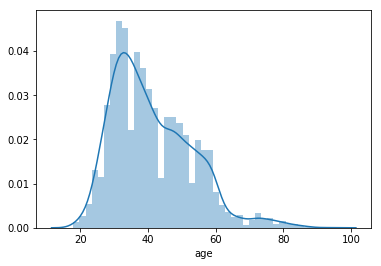

In [26]:
# Analysing varibale age 
sns.distplot(x_train['age'])

In [27]:
# let us calculate skewness and kurtosis
from scipy.stats import kurtosis
from scipy.stats import skew
K = kurtosis(x_train['age'])
s= skew(x_train['age'])
print('k:',K)
print('s:',s)

k: 0.5803580910175543
s: 0.8346431176842941


From the values of k and s we an say that the data is skewed . We will use log.

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


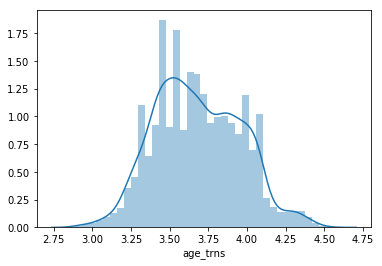

In [28]:
for df in combine_:
    df['age_trns'] = df['age'].apply(np.log)
sns.distplot(x_train['age_trns'])

In [29]:
K = kurtosis(x_train['age_trns'])
s= skew(x_train['age_trns'])
print('k:',K)
print('s:',s)

k: -0.45788600527126144
s: 0.17557152749802282


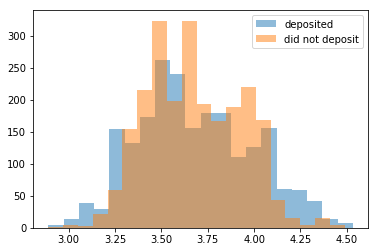

In [30]:
plt.figure()
x = df[df['deposit'] ==1]['age_trns']
y = df[df['deposit'] == 0]['age_trns']
plt.hist(x,bins=20,alpha=0.5,label = 'deposited')
plt.hist(y,bins=20,alpha=0.5,label = 'did not deposit')
plt.legend()
plt.show()

We can conclude from the above graph that both the graphs are mostly overlapping and the younger and the older people are more likely to deposit.

In [31]:
for df in  combine_:
    df['age_bands'] = pd.cut(df['age_trns'],bins=5,precision = 1)
x_train[['age_bands','deposit']].groupby('age_bands',as_index = False).mean().sort_values('deposit',ascending = False)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,age_bands,deposit
4,"(4.2, 4.6]",0.795580
0,"(2.9, 3.2]",0.707407
3,"(3.9, 4.2]",0.485480
1,"(3.2, 3.6]",0.474913
2,"(3.6, 3.9]",0.403830


We assign people in age band 1,2,3 - 1 and 0,4 -2

In [32]:
for df in combine_: 
    df.loc[df['age_trns']>=4.2,'age_trns']=2 
    df.loc[(df['age_trns']>=2.9) & (df['age_trns']<3.2),'age_trns']=2 
    df.loc[(df['age_trns']>=3.2) & (df['age_trns']<4.2),'age_trns']=1 
x_train.head()

C:\Users\vishi\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,age_trns,age_bands
10668,34,NaN,single,2,1,664,yes,0,cellular,11,0,88,2,343,2,1,0,1.0,"(3.2, 3.6]"
10997,35,NaN,married,3,1,1193,yes,1,unknown,2,1,101,2,-1,0,0,0,1.0,"(3.2, 3.6]"
10012,31,NaN,married,2,1,2420,yes,1,cellular,19,0,166,1,-1,0,0,0,1.0,"(3.2, 3.6]"
2941,36,NaN,single,2,1,376,no,1,cellular,13,0,193,1,92,1,2,1,1.0,"(3.6, 3.9]"
7877,53,NaN,married,3,1,1129,no,0,cellular,28,0,241,8,-1,0,0,0,1.0,"(3.9, 4.2]"


C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


k: 141.78443728301477
s: 8.739040042385994


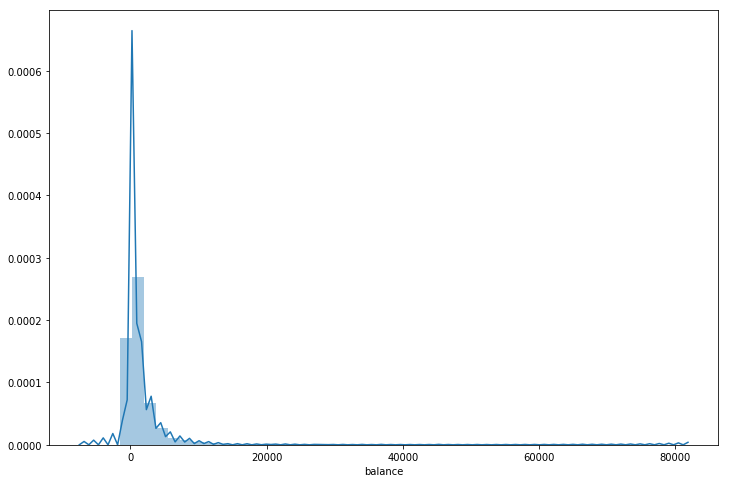

In [33]:
# analysing the variable balance
plt.figure(figsize=(12,8))
sns.distplot(x_train['balance'])
k_balance = kurtosis(x_train['balance'])
s_balance = skew(x_train['balance'])
print('k:',k_balance)
print('s:' ,s_balance)


C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


k:  1.185345058385943
s:  -0.03711785346021831


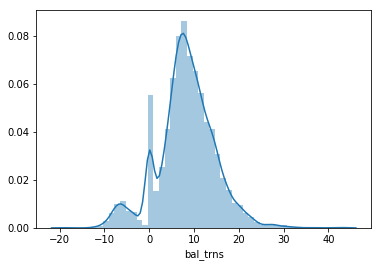

In [34]:
# we see that the variable has high k and s , so we will apply log trns.
for df in combine_:
    df['bal_trns'] = df['balance'].apply(np.cbrt)
sns.distplot(x_train['bal_trns'])
k_trns_bal = kurtosis(x_train['bal_trns'])
s_trns_bal = skew(x_train['bal_trns'])
print('k: ',k_trns_bal)
print('s: ',s_trns_bal)

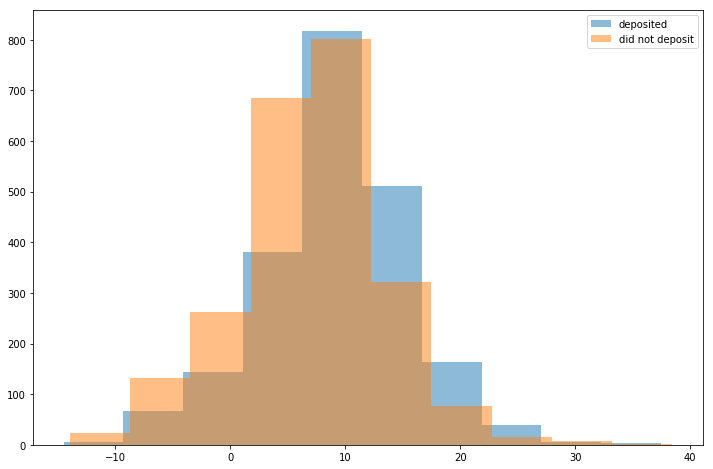

In [35]:
x=df[df['deposit']==1]['bal_trns']
y=df[df['deposit']==0]['bal_trns']
plt.figure(figsize=(12,8))
plt.hist(x,bins=10,alpha=0.5,label='deposited')
plt.hist(y,bins=10,alpha=0.5,label='did not deposit')
plt.legend()

The graph doesn't seem very useful to derive any conclusions. let us divide balance into bands.


In [38]:
x_train['bal_bands']=pd.cut(x_train['bal_trns'],bins=10)
x_train[['bal_bands','deposit']].groupby('bal_bands',as_index=False).mean().sort_values('bal_bands',ascending=False)

C:\Users\vishi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,bal_bands,deposit
9,"(37.075, 43.304]",0.500000
8,"(30.845, 37.075]",0.500000
7,"(24.616, 30.845]",0.480000
6,"(18.387, 24.616]",0.543165
5,"(12.157, 18.387]",0.567059
4,"(5.928, 12.157]",0.490346
3,"(-0.301, 5.928]",0.397843
2,"(-6.53, -0.301]",0.269710
1,"(-12.76, -6.53]",0.272189
0,"(-19.051, -12.76]",0.000000


We see that the higher the bank balance of the person is ,he / she is more likely to make to a deposit

C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


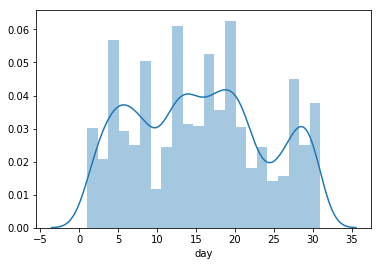

In [39]:
sns.distplot(x_train['day'])

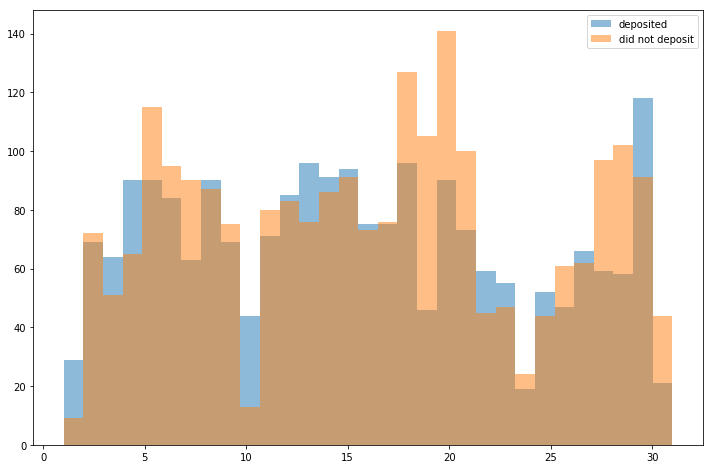

In [40]:
x=df[df['deposit']==1]['day']
y=df[df['deposit']==0]['day']
plt.figure(figsize=(12,8))
plt.hist(x,bins=31,alpha=0.5,label='deposited')
plt.hist(y,bins=31,alpha=0.5,label='did not deposit')
plt.legend()

We see that the data is almost symmetrically distributed and We see that the day on which the customer was contacted also doesn't have much influence on whether the person deposited or not although we might expect that the customer might deposit at the starting of every month as people usually tend have more money in hand in the beginning of every month.

k: 6.990612798701626
s: 2.1262607671932483


C:\Users\vishi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


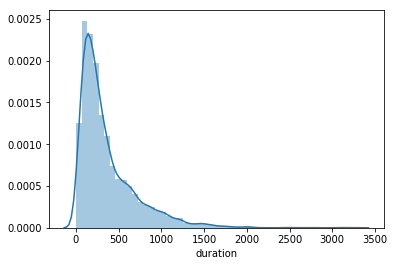

In [41]:
sns.distplot(x_train['duration'])
K_dur=kurtosis(x_train['duration'])
s_dur=skew(x_train['duration'])
print('k:',K_dur)
print('s:',s_dur)